# COGS 108 - Final Project (change this to your project's title)

# Overview

Our project was initially set out to assume that developed countries will tend to have more advanced health resources, which leads to a lower infection/death rate and a higher recovery rate during the COVID-19 pandemic. However, to further analyze, we separate the countries into two groups, developed and developing, and determine that there is no correlation between the economic status of a country and its COVID-19 health conditions. Plus, we even noticed that the developed countries have higher infection rate statistically, and both groups share the same death and recovery rates. 

# Names

* Li-An Wu
* Ray Huang
* Tony Lin
* Steven Kan

<a id='research_question'></a>
# Research Question

Does the GDP or poverty rate of a country affect its death/infected/recovered rate of the COVID-19?
 - Is there any negative correlation between the economic status and mortality rate of COVID-19?
 - Is there any negative correlation between the economic status and infection rate of COVID-19?
 - Is there any positive correlation between the economic status and recovered rate of COVID-19?

<a id='background'></a>

## Background & Prior Work

In December 2019, COVID-19 was first discovered in Wuhan, China. It is a highly contagious disease that causes severe complications to peoples’ respiratory systems. Its contagion has been unprecedentedly powerful and since its first appearance, more than a hundred million people have been infected worldwide, resulting in more than 2 million deaths. Many peoples’ lives have thus been affected by the pandemic. In fact, many other lethal viruses have also appeared in our history,  such as SARS virus, Ebola virus, and HIV virus etc… As we researched these past diseases, we found an interesting correlation- most of them appeared to be pervasive in areas of developing countries like Africa and Asia. With COVID-19 however, advanced countries like the United States, UK, France and many more seem to be the most severely affected areas in the world. Thus, we are interested to see if there is a relationship between the severity of COVID-19 and a country’s wealth level.

As we searched through the internet for similar projects, we have found a useful COVID-19 project from “Our World in Data”. This project has provided us with a visualized graph with death per millions people of each country put side by side. From this project, we found that many advanced countries such as Belgium, UK, and Germany have the highest death rate and developing countries like Tanzania have significantly lower death rates. 

In addition, we have also found another research by the british media “mail Online”, it points out that poor countries' death rate of covid may be significantly biased due to multiple reasons. For example, COVID-19 usually causes death in older people, but in poor countries, life expectancy simply just isn’t that long. Moreover, there are also multiple other diseases plaguing these countries, causing deaths and thus impairing the rate of death by COVID-19.

Reference:
* https://ourworldindata.org/covid-19-project-charts
* https://www.dailymail.co.uk/news/article-8697783/Are-people-Africa-protected-Covid-19-POVERTY.html 

# Hypothesis


Since a country’s medical and technological development is highly related to its financial power, we predict that countries with higher GDP and lower poverty rates will have a lower death and infection rate on COVID-19. If a country has a stronger health system and a more stable economy, we think that it has a higher chance of preventing the spread and severity of COVID-19.

# Dataset(s)

Dataset Name: Coronavirus death/infected population by country:   \
Link to the dataset: https://www.worldometers.info/coronavirus/#countries  \
Number of observation: 220  
Description: This dataset contains COVID related information by country.

Dataset Name: GDP by country              
Link to the dataset:
https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=512,914,612,614,311,213,911,314,193,122,912,313,419,513,316,913,124,339,638,514,218,963,616,223,516,918,748,618,624,522,622,156,626,628,228,924,233,632,636,634,238,662,960,423,935,128,611,321,243,248,469,253,642,643,939,734,644,819,172,132,646,648,915,134,652,174,328,258,656,654,336,263,268,532,944,176,534,536,429,433,178,436,136,343,158,439,916,664,826,542,967,443,917,544,941,446,666,668,672,946,137,546,674,676,548,556,678,181,867,682,684,273,868,921,948,943,686,688,518,728,836,558,138,196,278,692,694,962,142,449,564,565,283,853,288,293,566,964,182,359,453,968,922,714,862,135,716,456,722,942,718,724,576,936,961,813,726,199,733,184,524,361,362,364,732,366,144,146,463,528,923,738,578,537,742,866,369,744,186,925,869,746,926,466,112,111,298,927,846,299,582,487,474,754,698,&s=NGDPD,PPPGDP,&sy=2019&ey=2020&ssm=0&scsm=0&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1

Number of observation: 390            
Description: This dataset contains information about GDP of each country in US dollar (in Billions)

Dataset Name: Poverty rate by country:

Link to the dataset: https://worldpopulationreview.com/country-rankings/poverty-rate-by-country
Number of observation: 162           
Description: This dataset contains the poverty rate among all countries 
 

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Describe your data cleaning steps here.

1. drop all non relevent (not needed) columns
2. remove outliers

In [2]:
covid_death = pd.read_csv("worldometer_coronavirus.csv")
GDP_country = pd.read_csv('WEO_Data.csv', encoding = "ISO-8859-1")
poverty = pd.read_csv("csvData.csv")

In [3]:
#Removing commas from numbers
covid_death = covid_death.replace(',','', regex=True)
# Convert string to integer
covid_death['Total Cases'] = pd.to_numeric(covid_death['Total Cases'])
covid_death['Total Deaths'] = pd.to_numeric(covid_death['Total Deaths'])
covid_death['Total Recovered'] = pd.to_numeric(covid_death['Total Recovered'])
covid_death['Serious/Critical'] = pd.to_numeric(covid_death['Serious/Critical'])
covid_death['TotCases/ 1M pop'] = pd.to_numeric(covid_death['TotCases/ 1M pop'])
covid_death['Deaths/1M pop'] = pd.to_numeric(covid_death['Deaths/1M pop'])
covid_death['Total Tests'] = pd.to_numeric(covid_death['Total Tests'])
covid_death['Tests/1M pop'] = pd.to_numeric(covid_death['Tests/1M pop'])
covid_death['Population'] = pd.to_numeric(covid_death['Population'])

#Dropping Unused Columns.
covid_death = covid_death.drop(columns=['New Cases', 'New Deaths', 'Active Cases','Serious/Critical','Total Tests', 'Tests/1M pop' ])
covid_death.head()

,Country,Total Cases,Total Deaths,Total Recovered,TotCases/ 1M pop,Deaths/1M pop,Population
0,World,108416629,2381578.0,80605048.0,13909.0,305.5,NaN
1,USA,28010156,487171.0,17932117.0,84318.0,1467.0,3.321986e+08
2,India,10880794,155489.0,10589230.0,7837.0,112.0,1.388346e+09
3,Brazil,9716298,236397.0,8643693.0,45512.0,1107.0,2.134898e+08
4,Russia,4042837,79194.0,3559142.0,27696.0,543.0,1.459731e+08


In [4]:
GDP_country = GDP_country.drop(columns=['Subject Descriptor', 'Country/Series-specific Notes', 'Estimates Start After'])
#Adding units to GDP data to make information clear.
GDP_country = GDP_country[GDP_country['Units'] == "U.S. dollars"]
pd.set_option('display.max_rows', GDP_country.shape[0]+1)
GDP_country = GDP_country.reset_index(drop=True)
#Coverting strings to integers
GDP_country = GDP_country.replace(',','', regex=True)
GDP_country['2019'] = pd.to_numeric(GDP_country['2019'])
GDP_country['2020'] = pd.to_numeric(GDP_country['2020'])
GDP_country.head()

,Country,Units,Scale,2019,2020
0,Afghanistan,U.S. dollars,Billions,18.876,19.006
1,Albania,U.S. dollars,Billions,15.276,14.034
2,Algeria,U.S. dollars,Billions,169.267,147.323
3,Angola,U.S. dollars,Billions,89.417,62.724
4,Antigua and Barbuda,U.S. dollars,Billions,1.662,1.389


In [5]:
#Removing inconsistencies in naming of columns
GDP_country = GDP_country.rename(columns={'country': 'Country'})
GDP_countries = GDP_country['Country'].unique()
GDP_countries.sort()

covid_death_countries = covid_death['Country'].unique()
covid_death_countries.sort()

In [6]:
# Renaming the inconsistency in the country names
GDP_country['Country'] = GDP_country['Country'].replace(['Brunei Darussalam'], 'Brunei')
GDP_country['Country'] = GDP_country['Country'].replace(['Central African Republic'], 'CAR')
GDP_country['Country'] = GDP_country['Country'].replace(['Czech Republic'], 'Czechia')
GDP_country['Country'] = GDP_country['Country'].replace(["Côte d\'Ivoire"], 'Ivory Coast')
GDP_country['Country'] = GDP_country['Country'].replace(['Democratic Republic of the Congo'], 'DRC')
GDP_country['Country'] = GDP_country['Country'].replace(['Hong Kong SAR'], 'Hong Kong')
GDP_country['Country'] = GDP_country['Country'].replace(['Islamic Republic of Iran'], 'Iran')
GDP_country['Country'] = GDP_country['Country'].replace(['Korea'], 'S. Korea')
GDP_country['Country'] = GDP_country['Country'].replace(['Kyrgyz Republic'], 'Kyrgyzstan')
GDP_country['Country'] = GDP_country['Country'].replace(['Lao P.D.R.'], 'Laos')
GDP_country['Country'] = GDP_country['Country'].replace(['Macao SAR'], 'Macao')
GDP_country['Country'] = GDP_country['Country'].replace(['Republic of Congo'], 'Congo')
GDP_country['Country'] = GDP_country['Country'].replace(['Slovak Republic'], 'Slovakia')
GDP_country['Country'] = GDP_country['Country'].replace(['St. Kitts and Nevis'], 'Saint Kitts and Nevis')
GDP_country['Country'] = GDP_country['Country'].replace(['St. Lucia'], 'Saint Lucia')
GDP_country['Country'] = GDP_country['Country'].replace(['St. Vincent and the Grenadines'], 'St. Vincent Grenadines')
GDP_country['Country'] = GDP_country['Country'].replace(['São Tomé and Príncipe'], 'Sao Tome and Principe')
GDP_country['Country'] = GDP_country['Country'].replace(['Taiwan Province of China'], 'Taiwan')
GDP_country['Country'] = GDP_country['Country'].replace(['The Bahamas'], 'Bahamas')
GDP_country['Country'] = GDP_country['Country'].replace(['The Gambia'], 'Gambia')
GDP_country['Country'] = GDP_country['Country'].replace(['United Arab Emirates'], 'UAE')
GDP_country['Country'] = GDP_country['Country'].replace(['United Kingdom'], 'UK')
GDP_country['Country'] = GDP_country['Country'].replace(['United States'], 'USA')
GDP_country['Country'] = GDP_country['Country'].replace(['West Bank and Gaza'], 'Palestine')

In [7]:
# Match the corresponding countries 
combine = pd.merge(covid_death, GDP_country, on='Country')

combine = combine.drop(columns = '2019')
combine = combine.rename(columns={'2020': '2020 GDP'})

combine['Recovery Percentage'] = combine['Total Recovered'] / combine['Total Cases']
combine['Death Percentage'] = combine['Total Deaths'] / combine['Total Cases']
combine['GDP per Capita'] = combine['2020 GDP'] / combine['Population'] * 1e9

In [8]:
#2. add extra columns of infection rates per 100k and 200k 

#TotCases/ 1M pop	Deaths/1M pop
combine['TotCases_per_100k_pop'] = combine['TotCases/ 1M pop'] / 10
combine['Deaths_per_100k_pop'] = combine['Deaths/1M pop'] / 10
combine['log_TotCases_per_1M_pop'] = np.log( combine['TotCases/ 1M pop'])
combine['sqrt_TotCases_per_1M_pop'] = np.sqrt(combine['TotCases/ 1M pop'])

# Data Analysis & Results

In [9]:
combine.head()

,Country,Total Cases,Total Deaths,Total Recovered,TotCases/ 1M pop,Deaths/1M pop,Population,Units,Scale,2020 GDP,Recovery Percentage,Death Percentage,GDP per Capita,TotCases_per_100k_pop,Deaths_per_100k_pop,log_TotCases_per_1M_pop,sqrt_TotCases_per_1M_pop
0,USA,28010156,487171.0,17932117.0,84318.0,1467.0,3.321986e+08,U.S. dollars,Billions,20807.27,0.640201,0.017393,62635.037833,8431.8,146.7,11.342351,290.375619
1,India,10880794,155489.0,10589230.0,7837.0,112.0,1.388346e+09,U.S. dollars,Billions,2592.58,0.973204,0.014290,1867.388044,783.7,11.2,8.966611,88.526832
2,Brazil,9716298,236397.0,8643693.0,45512.0,1107.0,2.134898e+08,U.S. dollars,Billions,1363.77,0.889608,0.024330,6387.988182,4551.2,110.7,10.725731,213.335417
3,Russia,4042837,79194.0,3559142.0,27696.0,543.0,1.459731e+08,U.S. dollars,Billions,1464.08,0.880358,0.019589,10029.791237,2769.6,54.3,10.229043,166.421153
4,UK,3998655,115529.0,2056261.0,58712.0,1696.0,6.810580e+07,U.S. dollars,Billions,2638.30,0.514238,0.028892,38738.256103,5871.2,169.6,10.980399,242.305592


Include cells that describe the steps in your data analysis.

In [10]:
combine.describe()

,Total Cases,Total Deaths,Total Recovered,TotCases/ 1M pop,Deaths/1M pop,Population,2020 GDP,Recovery Percentage,Death Percentage,GDP per Capita,TotCases_per_100k_pop,Deaths_per_100k_pop,log_TotCases_per_1M_pop,sqrt_TotCases_per_1M_pop
count,1.870000e+02,176.000000,1.840000e+02,187.000000,176.000000,1.870000e+02,185.000000,184.000000,176.000000,185.000000,187.000000,176.000000,187.000000,187.000000
mean,5.789856e+05,13524.505682,4.363635e+05,20080.272727,399.169886,4.165806e+07,449.028486,0.828008,0.021446,13416.800734,2008.027273,39.916989,8.482276,111.789248
std,2.366707e+06,46573.355609,1.703491e+06,24531.287276,505.037987,1.509363e+08,1950.741054,0.187563,0.024280,18491.157593,2453.128728,50.503799,2.324829,87.316711
min,1.000000e+00,1.000000,1.000000e+00,3.000000,0.200000,3.397500e+04,0.225000,0.063932,0.000485,258.634519,0.300000,0.020000,1.098612,1.732051
25%,6.190000e+03,142.500000,4.861000e+03,1132.500000,21.750000,2.419295e+06,10.252000,0.795961,0.011018,1867.388044,113.250000,2.175000,7.032161,33.652453
50%,5.977700e+04,976.500000,4.490800e+04,9136.000000,119.000000,9.447402e+06,34.624000,0.899102,0.017329,4791.964803,913.600000,11.900000,9.119978,95.582425
75%,2.634390e+05,5805.500000,1.982050e+05,33945.000000,639.000000,3.084800e+07,241.975000,0.942329,0.025676,16301.398065,3394.500000,63.900000,10.432398,184.237141
max,2.801016e+07,487171.000000,1.793212e+07,107370.000000,2119.000000,1.439324e+09,20807.270000,1.000000,0.288660,108527.781644,10737.000000,211.900000,11.584036,327.673618


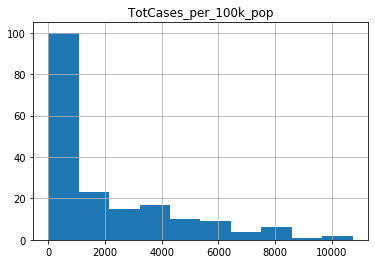

In [11]:
f1 = combine.hist(column = 'TotCases_per_100k_pop', bins = 10)    

We plotted a histogram of the total cases per 100k population to visualize how this variable is distributed.

The distribution for this variable doesn't seem to fit any of the common distributions, but the data was highly skewed to the right.

We observed that for many countries, the number of cases per 100k people remained on the low end.

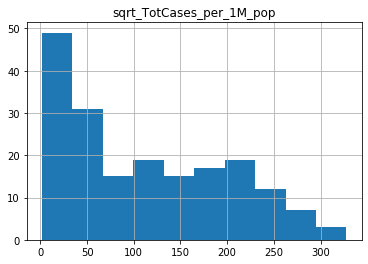

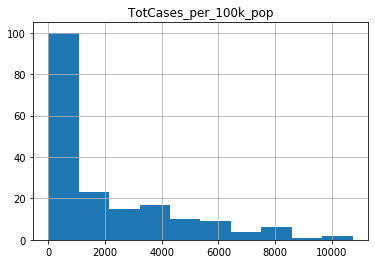

In [12]:
# log transformed data
f2 = combine.hist(column = 'sqrt_TotCases_per_1M_pop', bins = 10)   
f3 = combine.hist(column = 'TotCases_per_100k_pop', bins = 10)  

From the previous histogram, we observe that the shape of the distribution is strongly skewed to the right. This hard for us the visualized the detail.

Thus, we decide to tranform the value to a smaller scale. In the above graphs, we tried to transform the original data with taking the square root 

and dividing by 10.

We oberseve that taking the square root makes the data more cluster in a way that is convenient for us to visualize.



# GDP Data Part 1
we perform our analysis of the countries economic status based on the GDP.

we here display the central property of the GDP per capita data 

In [13]:
combine['GDP per Capita'].describe()

count       185.000000
mean      13416.800734
std       18491.157593
min         258.634519
25%        1867.388044
50%        4791.964803
75%       16301.398065
max      108527.781644
Name: GDP per Capita, dtype: float64

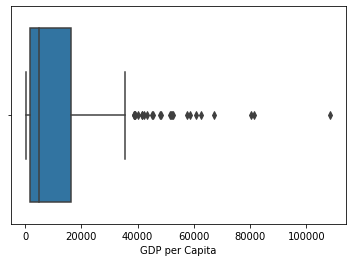

In [14]:
sns.boxplot(x='GDP per Capita', data=combine)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25da9150>]],
      dtype=object)

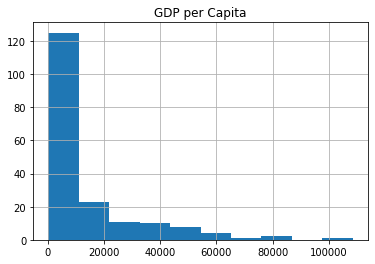

In [15]:
combine.hist(column = 'GDP per Capita')

We then plotted a histogram of the GDP per capita of all the countries. 

Again, the distribution for this variable doesn't seem to fit any of the common distributions, but the data was highly skewed to the right. 

We observed that for the vast majority of countries, GDP per capita was low ( < 20000 USD per year)

This prompted us to divide the countries based on their GDP per capita into two groups- developing and developed. 

Note that 20,000 USD per year is just an arbitrary sum that we collectively chose and is not a typical measure for whether a country is categorized as developed or developing. In this case though, countries whose citizens earn, on average, more than 20,000 USD per year is considered developed.

# GDP Data Part 2

We look at the statistc of GDP per capita and found that most of the data are highly clustered from 0 to 75 percentile. Thus we decide to break up

the data into two parts with 75 percentile as the threshold to minimize the imbalance of data.

We labeled them as combine_developing and combine_developed 

In [16]:
combine_developing = combine[combine['GDP per Capita'] < 16301.398065]
combine_developed = combine[combine['GDP per Capita'] >= 16301.398065]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26057390>]],
      dtype=object)

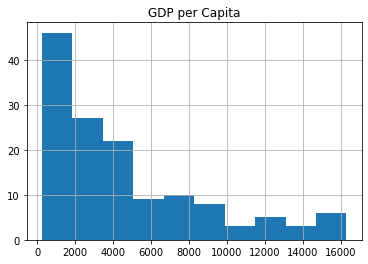

In [17]:
combine_developing.hist(column = 'GDP per Capita')

We then plotted a histogram of the GDP per capita of all the developing countries.

Again, the distribution for the variables doesn't seem to fit any of the common distributions, but the data was highly skewed to the right. 

We surprisingly observed that for the vast majority of developing countries, GDP per capita was much lower than we initially expected, (< 5,000 USD per year)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25dda590>]],
      dtype=object)

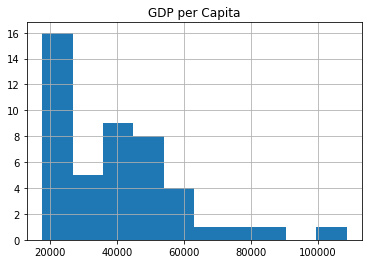

In [18]:
combine_developed.hist(column = 'GDP per Capita')

We then plotted a histogram of the GDP per capita of all the developed countries.

Again, the distribution for the variables doesn't seem to fit any of the common distributions, but the data was skewed to the right.

We observed that there is a country with a super high GDP, upon investigating, this turned out to be a tax haven for the wealthy.

# Comparing with death percentage

In [19]:
combine['Death Percentage'].describe()

count    176.000000
mean       0.021446
std        0.024280
min        0.000485
25%        0.011018
50%        0.017329
75%        0.025676
max        0.288660
Name: Death Percentage, dtype: float64

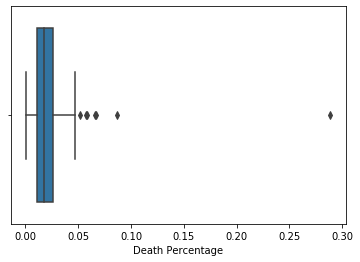

In [20]:
sns.boxplot(x='Death Percentage', data=combine)

In [21]:
death_percentage_outlier = combine[combine['Death Percentage'] > 0.25]
death_percentage_outlier.head()

,Country,Total Cases,Total Deaths,Total Recovered,TotCases/ 1M pop,Deaths/1M pop,Population,Units,Scale,2020 GDP,Recovery Percentage,Death Percentage,GDP per Capita,TotCases_per_100k_pop,Deaths_per_100k_pop,log_TotCases_per_1M_pop,sqrt_TotCases_per_1M_pop
160,Yemen,2134,616.0,1428.0,71.0,20.0,30226897.0,U.S. dollars,Billions,20.948,0.669166,0.28866,693.025156,7.1,2.0,4.26268,8.42615


Yemen is the country which has the highest death percentage. Since the data is the outlier, we normaly want to exclude it to check the normality of the distribution for the overall countries

In [22]:
combine = combine[combine['Death Percentage'] <= 0.25]
combine['Death Percentage'].describe()

count    175.000000
mean       0.019919
std        0.013423
min        0.000485
25%        0.010947
50%        0.017265
75%        0.025538
max        0.086984
Name: Death Percentage, dtype: float64

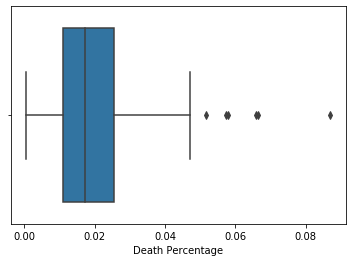

In [23]:
sns.boxplot(x='Death Percentage', data=combine)

For almost all countries:
- The average death percentage is about 2.00%
- The median death percentage is about 1.73%
- The maximum death percentage is about 8.70%

In [24]:
combine_developing = combine_developing[combine_developing['Death Percentage'] <= 0.25]
combine_developing['Death Percentage'].describe()

count    128.000000
mean       0.020757
std        0.014139
min        0.000890
25%        0.011221
50%        0.016889
75%        0.026704
max        0.086984
Name: Death Percentage, dtype: float64

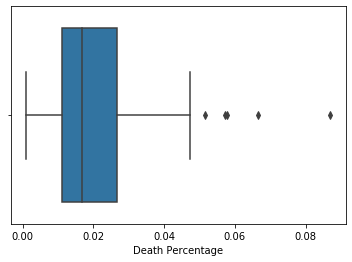

In [25]:
sns.boxplot(x='Death Percentage', data=combine_developing)

For the developing countries: 
- The average death percentage is about 2.08%
- The median death percentage is about 1.70%
- The maximum death percentage is about 8.70%

In [26]:
combine_developed['Death Percentage'].describe()

count    45.000000
mean      0.016477
std       0.008580
min       0.000485
25%       0.009605
50%       0.017265
75%       0.020931
max       0.035861
Name: Death Percentage, dtype: float64

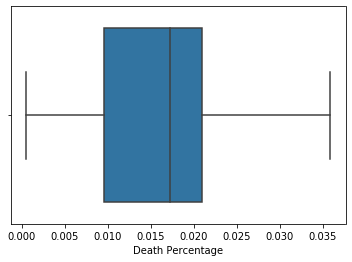

In [27]:
sns.boxplot(x='Death Percentage', data=combine_developed)

For the developed countries: 
- The average death percentage is about 1.65%
- The median death percentage is about 1.73%
- The maximum death percentage is about 3.59%

# Comparing with Recovery Percentage

In [28]:
combine['Recovery Percentage'].describe()

count    172.000000
mean       0.823205
std        0.190107
min        0.063932
25%        0.795961
50%        0.889854
75%        0.939331
max        0.996336
Name: Recovery Percentage, dtype: float64

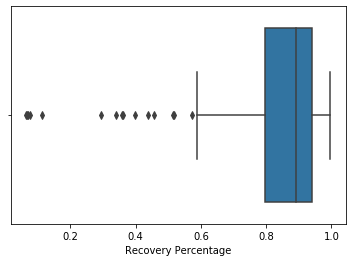

In [29]:
sns.boxplot(x='Recovery Percentage', data=combine)

For almost all countries:
- The average recovery percentage is about 82.80%
- The median recovery percentage is about 89.91%
- The maximum recovery percentage is about 100%

In [30]:
combine_developing['Recovery Percentage'].describe()

count    128.000000
mean       0.829883
std        0.162416
min        0.075468
25%        0.777137
50%        0.877776
75%        0.939331
max        0.993237
Name: Recovery Percentage, dtype: float64

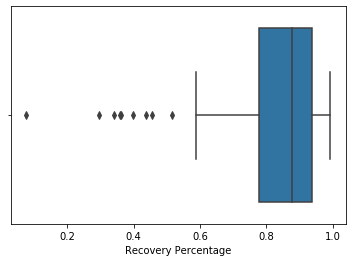

In [31]:
sns.boxplot(x='Recovery Percentage', data=combine_developing)

For developing countries:
- The average recovery percentage is about 83.47%
- The median recovery percentage is about 88.04%
- The maximum recovery percentage is about 100%

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c267e8f50>]],
      dtype=object)

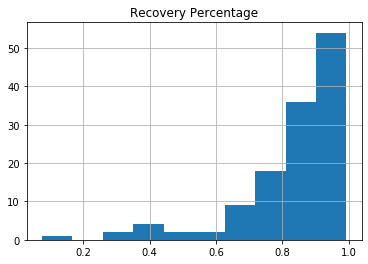

In [32]:
combine_developing.hist(column = 'Recovery Percentage')

We then plotted a histogram of the percentage of recovered patients in the developing countries.

The disitribution doesn't fit any of the common distributions, but the data was highly skewed to the left.

We observed that the recovery percentage is quite high for most developing countries, contrary to what we initially predicted.

In [33]:
combine_developed['Recovery Percentage'].describe()

count    43.000000
mean      0.809926
std       0.256441
min       0.063932
25%       0.833113
50%       0.904901
75%       0.942338
max       0.996336
Name: Recovery Percentage, dtype: float64

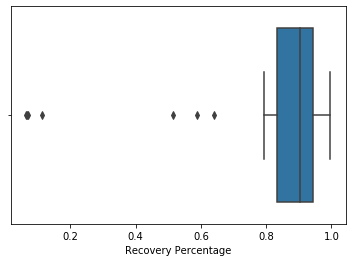

In [34]:
sns.boxplot(x='Recovery Percentage', data=combine_developed)

For developed countries:
- The average recovery percentage is about 81.00%
- The median recovery percentage is about 90.49%
- The maximum recovery percentage is about 99.63%

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26975a90>]],
      dtype=object)

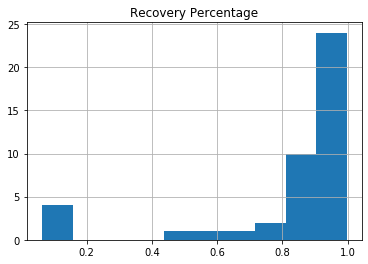

In [35]:
combine_developed.hist(column = 'Recovery Percentage')

We then plotted a histogram of the recovery percentage of all the developed countries.

Again, the distribution for the variables doesn't seem to fit any of the common distributions, but the data was skewed to the left. 

In [36]:
recovery_outlier = combine_developed[combine_developed['Recovery Percentage'] < 0.2]

In [37]:
recovery_outlier

,Country,Total Cases,Total Deaths,Total Recovered,TotCases/ 1M pop,Deaths/1M pop,Population,Units,Scale,2020 GDP,Recovery Percentage,Death Percentage,GDP per Capita,TotCases_per_100k_pop,Deaths_per_100k_pop,log_TotCases_per_1M_pop,sqrt_TotCases_per_1M_pop
5,France,3406685,80803.0,238753.0,52120.0,1236.0,65362676.0,U.S. dollars,Billions,2551.450,0.070084,0.023719,39035.274504,5212.0,123.6,10.861304,228.298051
25,Belgium,733100,21551.0,50362.0,63086.0,1855.0,11620726.0,U.S. dollars,Billions,503.416,0.068697,0.029397,43320.529199,6308.6,185.5,11.052254,251.169266
55,Ireland,206801,3846.0,23364.0,41596.0,774.0,4971670.0,U.S. dollars,Billions,399.064,0.112978,0.018598,80267.596200,4159.6,77.4,10.635759,203.950975
104,Cyprus,32175,218.0,2057.0,26530.0,180.0,1212770.0,U.S. dollars,Billions,23.246,0.063932,0.006775,19167.690494,2653.0,18.0,10.186031,162.880324


We observed that the recovery percentage is generally quite high, with 4 countries with super low recovery rates. Those 4 countries are France, Belgium, Ireland, Cyprus. Upon investigating, these countries had a low number of cases which hasn't concluded yet.  

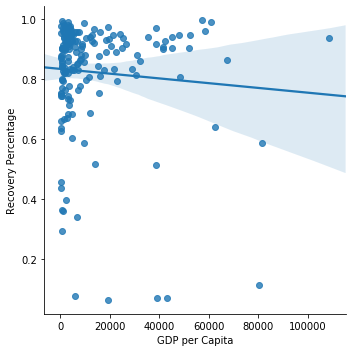

In [38]:
sns.lmplot(x='GDP per Capita', y='Recovery Percentage', data=combine, fit_reg=True);

In [39]:
outcome_1, predictors_1 = patsy.dmatrices('Q("Recovery Percentage") ~ Q("GDP per Capita")', combine)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                               OLS Regression Results                               
Dep. Variable:     Q("Recovery Percentage")   R-squared:                       0.006
Model:                                  OLS   Adj. R-squared:                  0.000
Method:                       Least Squares   F-statistic:                     1.014
Date:                      Wed, 17 Mar 2021   Prob (F-statistic):              0.315
Time:                              23:31:26   Log-Likelihood:                 42.032
No. Observations:                       170   AIC:                            -80.06
Df Residuals:                           168   BIC:                            -73.79
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

We plotted GDP per capita against recovery rate and made a linear model using OLS. Since R^2 is about 0.006, there is no sufficient evidence to support that the correlation between GDP Per Capita and Recovery Rate. This is most likely because most countries have GDP Per Capita lower than 20,000, so this graph is not normally distributed. 

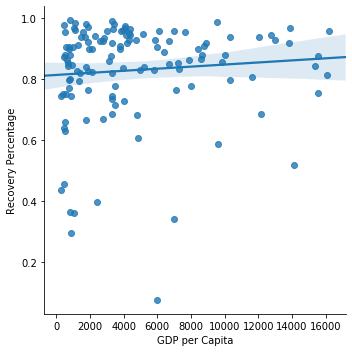

In [40]:
sns.lmplot(x='GDP per Capita', y='Recovery Percentage', data=combine_developing, fit_reg=True);

In [41]:
outcome_2, predictors_2 = patsy.dmatrices('Q("Recovery Percentage") ~ Q("GDP per Capita")', combine_developing)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                               OLS Regression Results                               
Dep. Variable:     Q("Recovery Percentage")   R-squared:                       0.008
Model:                                  OLS   Adj. R-squared:                 -0.000
Method:                       Least Squares   F-statistic:                    0.9760
Date:                      Wed, 17 Mar 2021   Prob (F-statistic):              0.325
Time:                              23:31:28   Log-Likelihood:                 52.024
No. Observations:                       128   AIC:                            -100.0
Df Residuals:                           126   BIC:                            -94.34
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Now we are focusing on the countries with less than 16,301 GDP Per Capita (75th percentile). We plotted GDP per capita against recovery rate and made a linear model using OLS. Since R^2 is about 0.008, there is no sufficient evidence to support that the correlation between GDP Per Capita and Recovery Rate for developing countries. 

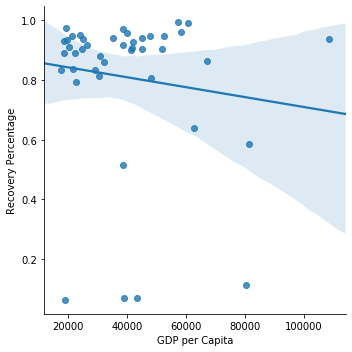

In [42]:
sns.lmplot(x='GDP per Capita', y='Recovery Percentage', data=combine_developed, fit_reg=True);

In [43]:
outcome_3, predictors_3 = patsy.dmatrices('Q("Recovery Percentage") ~ Q("GDP per Capita")', combine_developed)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                               OLS Regression Results                               
Dep. Variable:     Q("Recovery Percentage")   R-squared:                       0.016
Model:                                  OLS   Adj. R-squared:                 -0.008
Method:                       Least Squares   F-statistic:                    0.6873
Date:                      Wed, 17 Mar 2021   Prob (F-statistic):              0.412
Time:                              23:31:29   Log-Likelihood:                -1.6342
No. Observations:                        43   AIC:                             7.268
Df Residuals:                            41   BIC:                             10.79
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Now we are focusing on the countries with more than 16,301 GDP Per Capita (75th percentile). We plotted GDP per capita against recovery rate and made a linear model using OLS. Since R^2 is about 0.016, there is no sufficient evidence to support that the correlation between GDP Per Capita and Recovery Rate for developed countries. 

# Total Cases per 100k Population

In [44]:
combine['TotCases_per_100k_pop'].describe()

count      175.000000
mean      2144.123429
std       2478.388637
min          0.800000
25%        142.750000
50%       1058.600000
75%       3741.400000
max      10737.000000
Name: TotCases_per_100k_pop, dtype: float64

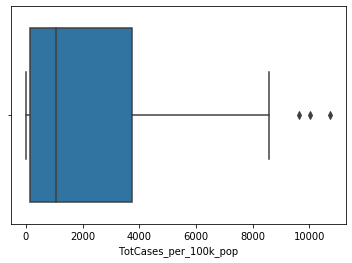

In [45]:
sns.boxplot(x='TotCases_per_100k_pop', data=combine)

For almost all countries:
- The average of total cases per 100k population is about 2144
- The median of total cases per 100k population  is about 1058
- The maximum of total cases per 100k population is about 10737

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c273bd350>]],
      dtype=object)

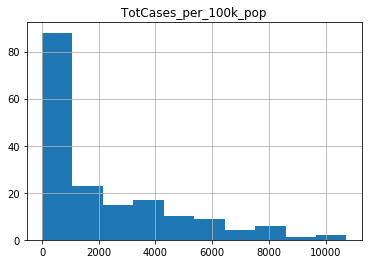

In [46]:
combine.hist(column = 'TotCases_per_100k_pop', bins = 10)

We then plotted a histogram of the total cases per 100k populatin. 

The distribution for the variables doesn't seem to fit any of the common distributions, but the data was highly skewed to the right.

We observed that for most countries, there is less than 10000 cases per 100k people.

In [47]:
combine_developing['TotCases_per_100k_pop'].describe()

count      128.000000
mean      1459.460938
std       1866.028938
min          0.800000
25%        115.875000
50%        571.400000
75%       2326.625000
max      10737.000000
Name: TotCases_per_100k_pop, dtype: float64

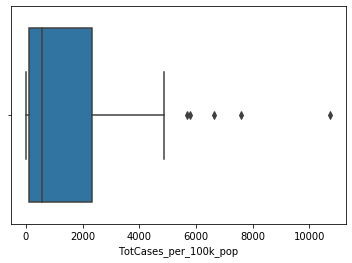

In [48]:
sns.boxplot(x='TotCases_per_100k_pop', data=combine_developing)

For developing countries:
- The average of total cases per 100k population is about 1459
- The median of total cases per 100k population  is about 571
- The maximum of total cases per 100k population is about 10737

combine_developing.hist(column = 'TotCases_per_100k_pop', bins = 10)

Again, we wanted to see if there are distribution differences between developing and developed countries. 

We plotted a histogram of the total cases per 100k population for developing countries.

The data, again, doesn't fit any common distributions and is skewed to the right.

We observed that again, most developing countries have a low number of cases per 100k population (<10000)

In [49]:
combine_developed['TotCases_per_100k_pop'].describe()

count       46.000000
mean      4088.789130
std       2941.385192
min          3.900000
25%       1315.950000
50%       4110.650000
75%       6286.400000
max      10017.200000
Name: TotCases_per_100k_pop, dtype: float64

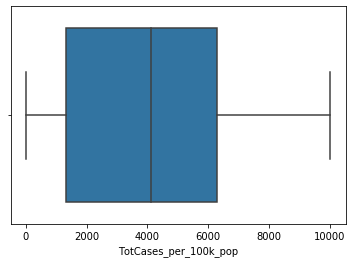

In [50]:
sns.boxplot(x='TotCases_per_100k_pop', data=combine_developed)

For developed countries:
- The average of total cases per 100k population is about 4088
- The median of total cases per 100k population  is about 4110
- The maximum of total cases per 100k population is about 10017

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2750ba50>]],
      dtype=object)

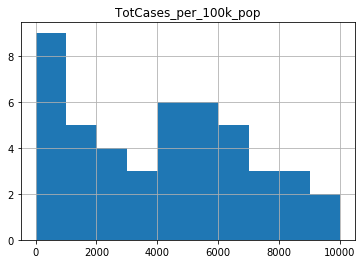

In [51]:
combine_developed.hist(column = 'TotCases_per_100k_pop', bins = 10)

We then plotted a histogram of the total cases per 100k population for developed countries.

The data, again, doesn't fit any common distributions, though one can argue that is it nearing a uniform distribution. However, the sample size is too low to say so. The data is skewed to the right.

We observed that developed countries' total cases per 100k population was much more varied than previous variables, but still favoring the low end of <10000 cases per 100k population.

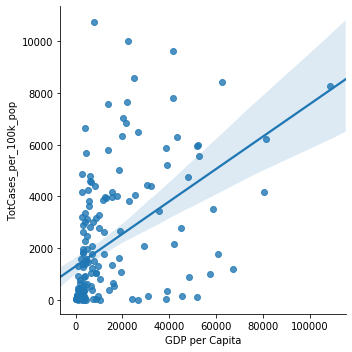

In [52]:
sns.lmplot(x='GDP per Capita', y='TotCases_per_100k_pop', data=combine, fit_reg=True);

In [53]:
total_cases_outlier = combine[combine['TotCases_per_100k_pop'] == max(combine['TotCases_per_100k_pop'])]
total_cases_outlier

,Country,Total Cases,Total Deaths,Total Recovered,TotCases/ 1M pop,Deaths/1M pop,Population,Units,Scale,2020 GDP,Recovery Percentage,Death Percentage,GDP per Capita,TotCases_per_100k_pop,Deaths_per_100k_pop,log_TotCases_per_1M_pop,sqrt_TotCases_per_1M_pop
91,Montenegro,67441,869.0,58210.0,107370.0,1384.0,628115.0,U.S. dollars,Billions,4.943,0.863125,0.012885,7869.578023,10737.0,138.4,11.584036,327.673618


Montenegro had the significant high total cases per 100k people among all other countries, and it may cause the correlation and R^2 to be inaccurate between GDP Per Capita and Total Cases Per 100k People. 

In [54]:
outcome_4, predictors_4 = patsy.dmatrices('Q("TotCases_per_100k_pop") ~ Q("GDP per Capita")', combine)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                                OLS Regression Results                                
Dep. Variable:     Q("TotCases_per_100k_pop")   R-squared:                       0.227
Model:                                    OLS   Adj. R-squared:                  0.223
Method:                         Least Squares   F-statistic:                     50.27
Date:                        Wed, 17 Mar 2021   Prob (F-statistic):           3.38e-11
Time:                                23:31:32   Log-Likelihood:                -1575.1
No. Observations:                         173   AIC:                             3154.
Df Residuals:                             171   BIC:                             3161.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

We plotted GDP per capita against total cases per 100k population and made a linear model using OLS. 
Since the R^2 is about 0.227, there is no sufficient evidence to support that the correlation between GDP Per Capita and Total Cases Per 100k Population. This is most likely because most countries have GDP Per Capita lower than 16,301, so this graph is not normally distributed. 

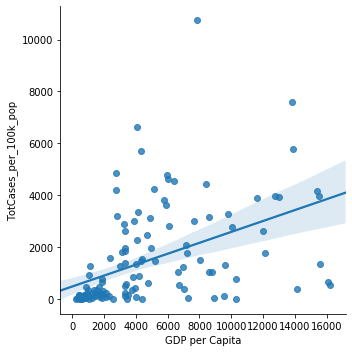

In [55]:
sns.lmplot(x='GDP per Capita', y='TotCases_per_100k_pop', data=combine_developing, fit_reg=True);

In [56]:
outcome_6, predictors_6 = patsy.dmatrices('Q("TotCases_per_100k_pop") ~ Q("GDP per Capita")', combine_developing)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
print(res_6.summary())

                                OLS Regression Results                                
Dep. Variable:     Q("TotCases_per_100k_pop")   R-squared:                       0.221
Model:                                    OLS   Adj. R-squared:                  0.215
Method:                         Least Squares   F-statistic:                     35.69
Date:                        Wed, 17 Mar 2021   Prob (F-statistic):           2.21e-08
Time:                                23:31:33   Log-Likelihood:                -1129.2
No. Observations:                         128   AIC:                             2262.
Df Residuals:                             126   BIC:                             2268.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

Now we are focusing on the countries with less than 16,301 GDP Per Capita. We then plotted GDP per capita against total cases per 100k population and made a linear model using OLS. Since the R^2 is about 0.221, this is no sufficient evidence to support that the correlation between GDP Per Capita and Total Cases Per 100k People for developing countries. 

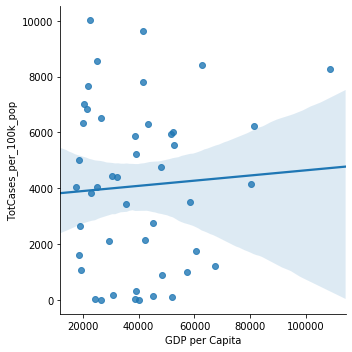

In [57]:
sns.lmplot(x='GDP per Capita', y='TotCases_per_100k_pop', data=combine_developed, fit_reg=True);

In [58]:
outcome, predictors = patsy.dmatrices('Q("TotCases_per_100k_pop") ~ Q("GDP per Capita")', combine_developed)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                                OLS Regression Results                                
Dep. Variable:     Q("TotCases_per_100k_pop")   R-squared:                       0.004
Model:                                    OLS   Adj. R-squared:                 -0.019
Method:                         Least Squares   F-statistic:                    0.1659
Date:                        Wed, 17 Mar 2021   Prob (F-statistic):              0.686
Time:                                23:31:34   Log-Likelihood:                -432.06
No. Observations:                          46   AIC:                             868.1
Df Residuals:                              44   BIC:                             871.8
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

Now we are focusing on the countries with more than 16,301 GDP Per Capita. We then plotted GDP per capita against total cases per 100k population and made a linear model using OLS. Since the R^2 is about 0.004, this is no sufficient evidence to support that the correlation between GDP Per Capita and Total Cases Per 100k People for developed countries. 

## Comparing with Death per 100k Population

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2802d8d0>]],
      dtype=object)

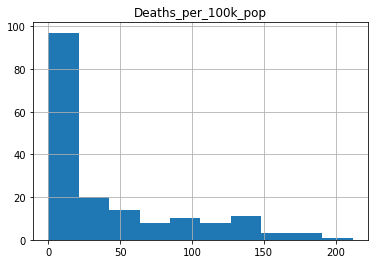

In [59]:
combine.hist(column = 'Deaths_per_100k_pop', bins = 10)

We then plotted a histogram of the death per 1 million population.
The distribution for the variables doesn't seem to fit any of the common distributions, but the data was 
highly skewed to the right.
We observed that for most countries, there is less than 500 deaths per 1 million peopple.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c280d8f50>]],
      dtype=object)

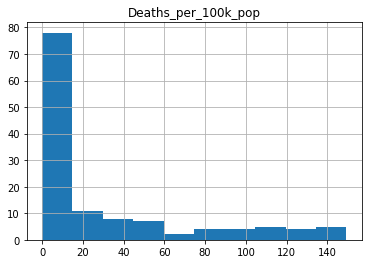

In [60]:
combine_developing.hist(column = 'Deaths_per_100k_pop', bins = 10)

Again, we wanted to see if there are distribution differences between developing and developed countries.
We plotted a histogram of the deaths per 100k population for developing countries.
The data, again, doesn't fit any common distributions and is skewed to the right.
We observed that again, most developing countries have a low number of death per 100k people (<200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c280f0d50>]],
      dtype=object)

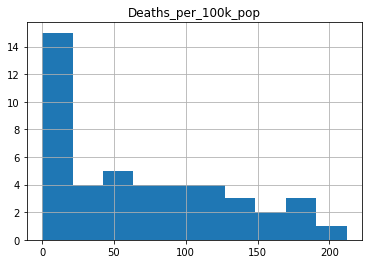

In [61]:
combine_developed.hist(column = 'Deaths_per_100k_pop', bins = 10)

We then plotted a histogram of the deaths per 100k population for developed countries.
The data, again, doesn't fit any common distributions, though one can argue that is it nearing a uniform distribution. However, the sample size is too low to say so. The data is skewed to the right.
We observed that developed countries' deaths per 100k population was much more varied than previous variables, but still favoring the low end of <500 cases per 100k population.

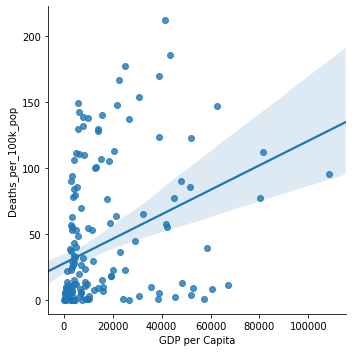

In [62]:
sns.lmplot(x='GDP per Capita', y='Deaths_per_100k_pop', data=combine, fit_reg=True);

In [63]:
outcome_5, predictors_5 = patsy.dmatrices('Q("Deaths_per_100k_pop") ~ Q("GDP per Capita")', combine)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
print(res_5.summary())

                               OLS Regression Results                               
Dep. Variable:     Q("Deaths_per_100k_pop")   R-squared:                       0.119
Model:                                  OLS   Adj. R-squared:                  0.114
Method:                       Least Squares   F-statistic:                     23.13
Date:                      Wed, 17 Mar 2021   Prob (F-statistic):           3.31e-06
Time:                              23:31:36   Log-Likelihood:                -913.26
No. Observations:                       173   AIC:                             1831.
Df Residuals:                           171   BIC:                             1837.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

We plotted GDP per capita against the total deaths per 100k population and made a linear model using OLS. Since the R^2 is about 0.119, there is no sufficient evidence to support that the correlation between GDP Per Capita and Total Deaths Per 100k People. This is most likely because most countries have GDP Per Capita lower than 16301, so this graph is not normally distributed.

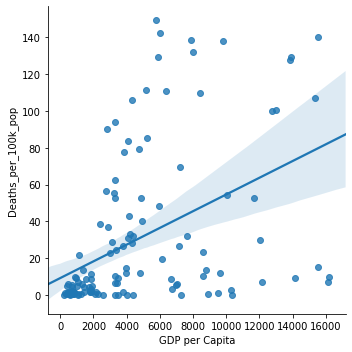

In [64]:
sns.lmplot(x='GDP per Capita', y='Deaths_per_100k_pop', data=combine_developing, fit_reg=True);

In [65]:
outcome, predictors = patsy.dmatrices('Q("Deaths_per_100k_pop") ~ Q("GDP per Capita")', combine_developing)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                               
Dep. Variable:     Q("Deaths_per_100k_pop")   R-squared:                       0.205
Model:                                  OLS   Adj. R-squared:                  0.199
Method:                       Least Squares   F-statistic:                     32.48
Date:                      Wed, 17 Mar 2021   Prob (F-statistic):           8.09e-08
Time:                              23:31:37   Log-Likelihood:                -644.40
No. Observations:                       128   AIC:                             1293.
Df Residuals:                           126   BIC:                             1298.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Now we are focusing on the countries with less than 16301 GDP Per Capita. We plotted GDP per capita against the total deaths per 100k population and made a linear model using OLS. Since the R^2 is about 0.205, there is still no sufficient evidence to support that the correlation between GDP Per Capita and Total Deaths Per 100k People for developing countries.

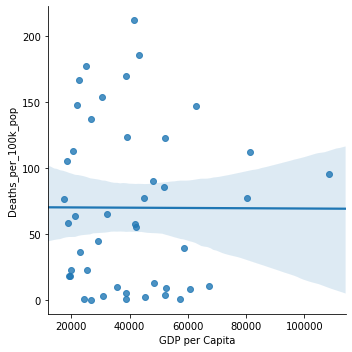

In [66]:
sns.lmplot(x='GDP per Capita', y='Deaths_per_100k_pop', data=combine_developed, fit_reg=True);

In [67]:
outcome8, predictors8 = patsy.dmatrices('Q("Deaths_per_100k_pop") ~ Q("GDP per Capita")', combine_developed)
mod = sm.OLS(outcome8, predictors8)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                               
Dep. Variable:     Q("Deaths_per_100k_pop")   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.023
Method:                       Least Squares   F-statistic:                 0.0004727
Date:                      Wed, 17 Mar 2021   Prob (F-statistic):              0.983
Time:                              23:31:39   Log-Likelihood:                -248.87
No. Observations:                        45   AIC:                             501.7
Df Residuals:                            43   BIC:                             505.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Now we are focusing on the countries with less than 16301 GDP Per Capita. We plotted GDP per capita against the total deaths per 100k population and made a linear model using OLS. Since the R^2 is about 0.205, there is still no sufficient evidence to support that the correlation between GDP Per Capita and Total Deaths Per 100k People for developing countries.

# Outlier Removal

In [68]:
combine_developed_outlier = combine_developed[combine_developed['Deaths_per_100k_pop'] > 200]
combine_developed_outlier

,Country,Total Cases,Total Deaths,Total Recovered,TotCases/ 1M pop,Deaths/1M pop,Population,Units,Scale,2020 GDP,Recovery Percentage,Death Percentage,GDP per Capita,TotCases_per_100k_pop,Deaths_per_100k_pop,log_TotCases_per_1M_pop,sqrt_TotCases_per_1M_pop
152,San Marino,3278,72.0,2956.0,96483.0,2119.0,33975.0,U.S. dollars,Billions,1.41,0.901769,0.021965,41501.103753,9648.3,211.9,11.477122,310.617128


San Marino had the significant high death rate among other developed countries, and it may cause the correlation and R^2 to be inaccurate between GDP Per Capita and Total Death Rate Per 100k People.

In [69]:
outcome, predictors = patsy.dmatrices('Q("Deaths_per_100k_pop") ~ Q("GDP per Capita")', combine_developed)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                               
Dep. Variable:     Q("Deaths_per_100k_pop")   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.023
Method:                       Least Squares   F-statistic:                 0.0004727
Date:                      Wed, 17 Mar 2021   Prob (F-statistic):              0.983
Time:                              23:31:39   Log-Likelihood:                -248.87
No. Observations:                        45   AIC:                             501.7
Df Residuals:                            43   BIC:                             505.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Now we are focusing on the countries with more than 20,000 GDP Per Capita.We then plotted GDP per capita against the total deaths per 100k population and made a linear model using OLS. Since the R^2 is about 0.205, this is no sufficient evidence to support that the correlation between GDP Per Capita and Total Deaths Per 100k People for developed countries. 

# Ethics & Privacy

In this project, we plan to fetch our data from official organizations such as the IMF(International Monetary Fund), authorized global database(worldmeters), or some country’s government databases. In theory, we do not expect any bias and privacy issues to rise from the data. However, there are several potential problems that are extremely likely to exist. Many countries' governments may have chosen to intentionally provide modified infection rates, death rates, and other information for political and economic purposes. There are also some poorer countries that cannot afford to have wide-spread covid tests or medical supplies for their people. These issues may cause the data for our project to be inaccurate. To deal with the issue, we would try to have separated analysis on data of the advanced countries and the developing ones. By doing so, we can evaluate each country with countries in similar conditions, which would also allow our analysis to be more intuitive visibly. Therefore, despite the information quality varies from country to country, we can create reasonable analysis surrounding our research question with the limited data we obtained.

# Conclusion & Discussion

<b>Conclusion</b>:

Our initial hypothesis that GDP of a country will have correlations between death/infected/recovered rate from COVID-19 is not supported by the use of linear regressions and measuring of central tendency. We even splited the countries into developing and developed based on the 75th percentile GDP per capita(16,301 USD), and removed any possible outliers existed in both datasets. 

- For death rate, both developing and developed countries have the average of 1.73% death percentage. Futhermore, we attempted the linear regression method by taking both developing and developed countries' GDP as the independent variable and the deaths_per_100k as dependent variable, but their R^2 values suggest that there is not sufficient evidence to prove the negative correlation between GDP per capita and the death rates. This result contradicts our initial assumption that the developed countries with the advanced medical treatments will have much lower death percentage than the devloping countries. 


- For infection rate(total cases per 100k population), the developing countries have 1,459 cases per 100k population and developed countries have 4,110 cases per 100k population. This result surprises us with the fact that developed countries have even higher infection rate than the developing countries. We wonder whether the COVID-19 data provided by those developing countries is reliable and transparent, or the fact that the people living in developing countries have stronger public awareness to danger of COVID-19 than those living in developed countries. Futhermore, we attempted the linear regression method by taking both developing and developed countries' GDP as the independent variable and the infection rate as dependent variable, but their R^2 values suggest that there is not sufficient evidence to prove the negative correlation between GDP per capita and the infection rates. This result contradicts our initial assumption that the developed countries will have much lower infection rate than the devloping countries. 


- For recovery rate, the developing countries have average of 83% recovery rate and developed countries have the average of 81% recovery percentage. Since both of them have the almost equivalent average recovery rate, the recovery rate might not be depended on the factor of GDP(the poverty rate). Futhermore, we attempted the linear regression method by taking both developing and developed countries' GDP as the independent variable and the recovery percentage as dependent variable, but their R^2 values suggest that there is not sufficient evidence to prove the positive correlation between GDP per capita and the recovery rates. This result contradicts our initial assumption that the developed countries with the advanced medical treatments will have higher recovery rate than the devloping countries. 



<b>Discussion</b>:
  
- Limitation in our analysis are based on the GDP from IMF(International Monetary Fund) and COVID-19 data from worldometers official website. Our final result shows that for each country, there is <b>NO</b> correlation between GDP Per Capita(poverty rate) and death/infected/recovered rate from COVID-19. We even discovered that developed countries have higher infection rate than the developing countries. Thus, we question about two possible scenarios:

     1. Are the COVID-19 data provided by those developing countries reliable and transparent? 
     2. Is it possible that the people living in developing countries have stronger public awareness toward the danger of 
     COVID-19 than those living in developed countries?

# Team Contributions

We all worked collectively via zoom and everyone contributes to every parts of the project.

Li-An Wu: Proposal, Data Cleaning, Hypothesis, Finding dataset, EDA, Ethics and Privacy, Conclusion and Discussion

Tony Lin: Proposal, Data Cleaning, Hypothesis, Finding dataset, EDA, Ethics and Privacy, Conclusion and Discussion

Ray Hunag: Proposal, Data Cleaning, Hypothesis, Finding dataset, EDA, Ethics and Privacy, Conclusion and Discussion

Steven Kan: Proposal, Data Cleaning, Hypothesis, Finding dataset, EDA, Ethics and Privacy, Conclusion and Discussion